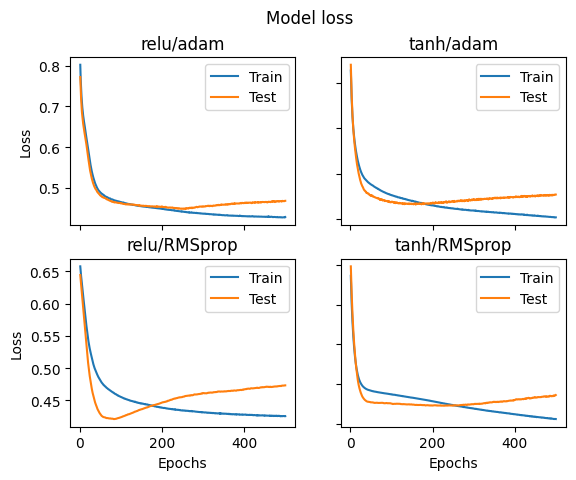

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from keras.utils.vis_utils import plot_model
import pydot


df = pd.read_csv("diabetes.csv")

(train_inputs, test_inputs) = train_test_split(df, test_size=0.3, random_state=2137)

numeric_features = df[["pregnant-times", "glucose-concentr", "blood-pressure", "skin-thickness", "insulin", "mass-index", "pedigree-func", "age"]]
target = df.pop("class")
target = target.map({"tested_positive": 1, "tested_negative": 0})
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(numeric_features)


def get_model(act, opt, ax):
    model = tf.keras.Sequential([
        normalizer,
        tf.keras.layers.Dense(6, activation=act),
        tf.keras.layers.Dense(3, activation=act),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])

    model.compile(
        optimizer=opt,
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy"]
    )

    history = model.fit(
        numeric_features,
        target,
        epochs=500,
        validation_split=0.3,
        verbose=0
    )

    train_loss = history.history["loss"]
    test_loss = history.history["val_loss"]

    epochs = range(1, len(train_loss) + 1)

    ax.plot(epochs, train_loss, label="Train")
    ax.plot(epochs, test_loss, label="Test")
    ax.set_title(f"{act}/{opt}")
    return model, history, f"{act}/{opt}"


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle("Model loss")

model1, history1, title1 = get_model("relu", "adam", ax1)
model2, history2, title2 = get_model("tanh", "adam", ax2)
model3, history3, title3 = get_model("relu", "RMSprop", ax3)
model4, history4, title4 = get_model("tanh", "RMSprop", ax4)

for ax in fig.get_axes():
    ax.set(xlabel="Epochs", ylabel="Loss")
    ax.legend()
    ax.label_outer()

plt.show()

# plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# img = plt.imread('model_plot.png')
# plt.figure(figsize=(10, 10))
# plt.imshow(img)
# plt.axis('off')
# plt.show()


c) Trenowanie sieci neuronowej należy przerwać w momencie, kiedy zaczyna ona się przeuczać. (znaczy że sieć neuronowa nauczyła się na pamięć danych treningowych i nie jest w stanie obsługiwać nowych danych).

Można odczytać to z krzywej błędu (loss curve) na wykresie. Kiedy krzywa dla danych treningowych ciągle maleje, ale dla danych walidacyjnych (lub testowych) zaczyna rosnąć, a od pewnego momentu maleć lub utrzymywać się na stałym poziomie. Wtedy możemy wnioskować, że sieć neuronowa zaczyna się przeuczać.

Jeśli krzywa dla danych treningowych jest na stałym poziomie, to możemy wnioskować, że występuje niedouczeniem - sieć neuronowa nie nauczyła się wystarczająco dobrze danych treningowych i nie jest w stanie działać na nowych danych.